# Decision Tree

Decision Tree algorithm belongs to the family of supervised learning algorithms. Decision Trees are
versatile Machine Learning algorithms that can perform both classification and regression tasks, but
mostly it is preferred for solving Classification problems. A decision tree is an upside-down tree that
makes decisions based on the conditions present in the data.

## Important Terminology related to Decision Trees
Root Node               : It represents the entire population or sample and this further gets divided into two
                          or more homogeneous sets.
                          
                          
Splitting               : It is a process of dividing a node into two or more sub-nodes.


Decision Node           : When a sub-node splits into further sub-nodes, then it is called the decision node.


Leaf / Terminal Node    : Nodes that do not split are called Leaf or Terminal nodes.


Branch / Sub-Tree       : A subsection of the entire tree is called branch or sub-tree.


Parent and Child Node   : A node, which is divided into sub-nodes is called a parent node of subnodes whereas sub-nodes are the                           child of a parent node.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv("C:\\Users\\pc\\Desktop\\Data Science\\MachineLearning\\Starts\\Social_Network_Ads.csv")

In [3]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:, :-1].values  # Declaring feature matrix
y = df.iloc[:, -1].values   # Declaring target variable

### Splitting the dataset inot the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
print(len(y_train))

300


In [7]:
print(len(y_test))

100


### Feature Scaling (Optional)

In [8]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

## Building the Decision Tree on the Training set

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy' , random_state=0)

In [10]:
# Fitting decision tree on data

classifier = classifier.fit(X_train, y_train)

## Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Making the Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[62  6]
 [ 3 29]]


Text(0.5, 257.44, 'Predicted label')

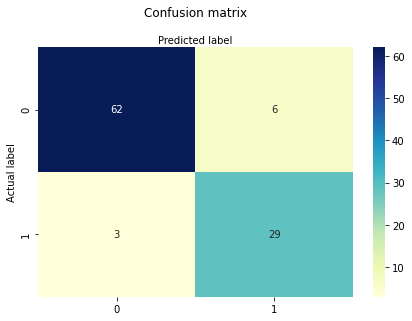

In [14]:
class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Model Evaluation

In [15]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.91
Precision: 0.8285714285714286
Recall: 0.90625
f1: 0.8656716417910447


## ROC curve

In [16]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = classifier.predict_proba(X_test)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds)

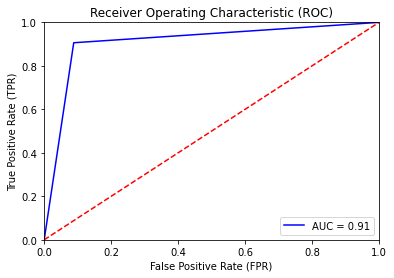

In [17]:
#---find the area under the curve---

roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()